# Credit Card Fraud Detection
 

## About the Problem Statement:

In this age of digitilization,where are all the major transactions are carried online,the system in charge has to cope up with all kind of transaction which are carried under their belt.for this use case,the major source of transactions were being held with credit cards.So It is very important that credit card companies are able to recognize fraudulent credit card transactions, so that customers are not charged for items that they did not purchase.Throughout the financial sector, machine learning algorithms are being developed to detect fraudulent transactions,here we are looking into one of such case.

### About the datasets:

The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in the span of two days respectively.
It contains only numerical input variables which are the result of a PCA transformation.This is a sample of real world data,which is confidential so all of these are being masked off.
The features we have are:Features V1, V2, ... V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning.
Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.


### Methodology

 AIM: To Identify fraudulent credit card transactions.

#### Approach:
Given the class imbalance ratio, we will measure the accuracy using the Area Under the Precision-Recall Curve (AUPRC).
Also do note that Confusion matrix accuracy is not meaningful for unbalanced classification.

### Source of Data:
The dataset has been collected and analysed during a research collaboration of Worldline and the Machine Learning Group (http://mlg.ulb.ac.be) of ULB (Université Libre de Bruxelles) on big data mining and fraud detection. More details on current and past projects on related topics are available on https://www.researchgate.net/project/Fraud-detection-5 and the page of the DefeatFraud project

In [2]:
#Importing the required libraries!!

import numpy as np
import pandas as pd
import sklearn
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import dtale as dt
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from pylab import rcParams
rcParams['figure.figsize'] = 14, 8
RANDOM_SEED = 42
LABELS = ["Normal", "Fraud"]


In [4]:
data = pd.read_csv('creditcard.csv',sep=',')
data.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0     0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1     0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2     1 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3     1 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4     2 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  
3 -0.221929  0.062723  0.061458  123.50      0  
4  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 31 columns]

In [5]:
print(data.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [6]:
# Print the shape of the data
data = data.sample(frac=0.1, random_state = 1)
print(data.shape)
print(data.describe())

# V1 - V28 are the results of a PCA Dimensionality reduction to protect user identities and sensitive features

(2000, 31)
               Time           V1           V2           V3           V4  \
count   2000.000000  2000.000000  2000.000000  2000.000000  2000.000000   
mean   30250.273000    -0.245696    -0.090234     0.711369     0.053512   
std    16904.987797     2.044502     2.176711     1.057961     1.400190   
min        2.000000   -56.407510   -72.715728    -6.605265    -4.434211   
25%     4350.750000    -1.005504    -0.652028     0.184074    -0.907659   
50%    38079.000000    -0.289163     0.054197     0.755537     0.093389   
75%    40204.500000     1.146880     0.754597     1.392412     0.957342   
max    47051.000000     1.619130     6.308177     3.672998    16.491217   

                V5           V6           V7           V8           V9  ...  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000  ...   
mean     -0.228192     0.125187    -0.058701     0.047851    -0.117794  ...   
std       1.386975     1.365427     1.053848     0.995159     1.109862  ... 

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    20000 non-null  int64  
 1   V1      20000 non-null  float64
 2   V2      20000 non-null  float64
 3   V3      20000 non-null  float64
 4   V4      20000 non-null  float64
 5   V5      20000 non-null  float64
 6   V6      20000 non-null  float64
 7   V7      20000 non-null  float64
 8   V8      20000 non-null  float64
 9   V9      20000 non-null  float64
 10  V10     20000 non-null  float64
 11  V11     20000 non-null  float64
 12  V12     20000 non-null  float64
 13  V13     20000 non-null  float64
 14  V14     20000 non-null  float64
 15  V15     20000 non-null  float64
 16  V16     20000 non-null  float64
 17  V17     20000 non-null  float64
 18  V18     20000 non-null  float64
 19  V19     20000 non-null  float64
 20  V20     20000 non-null  float64
 21  V21     20000 non-null  float64
 22

## Exploratory Data Analysis

In [7]:
# Plot histograms of each parameter 
data.hist(figsize = (20, 20))
plt.show()

In [6]:
data.isnull().values.any()

False

Text(0, 0.5, 'Frequency')

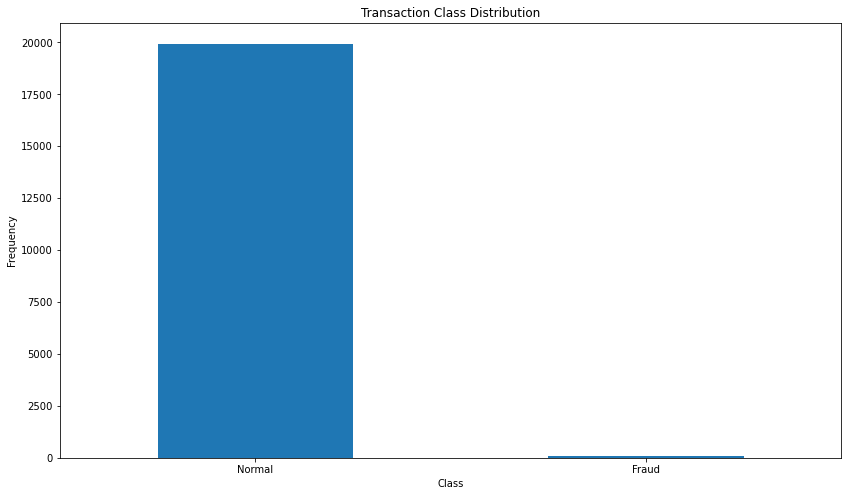

In [7]:
count_classes = pd.value_counts(data['Class'], sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("Transaction Class Distribution")

plt.xticks(range(2), LABELS)

plt.xlabel("Class")

plt.ylabel("Frequency")

In [10]:
## Get the Fraud and the normal dataset 

fraud = data[data['Class']==1]

normal = data[data['Class']==0]

In [11]:
print(fraud.shape,normal.shape)

(64, 31) (19936, 31)


In [12]:
## We need to analyze more amount of information from the transaction data
#How different are the amount of money used in different transaction classes?
fraud.Amount.describe()

count     64.000000
mean     110.076562
std      184.225278
min        0.000000
25%        1.345000
50%       25.905000
75%      111.857500
max      821.220000
Name: Amount, dtype: float64

In [13]:
normal.Amount.describe()

count    19936.000000
mean        99.908370
std        263.975299
min          0.000000
25%          7.280000
50%         28.700000
75%         89.900000
max      11898.090000
Name: Amount, dtype: float64

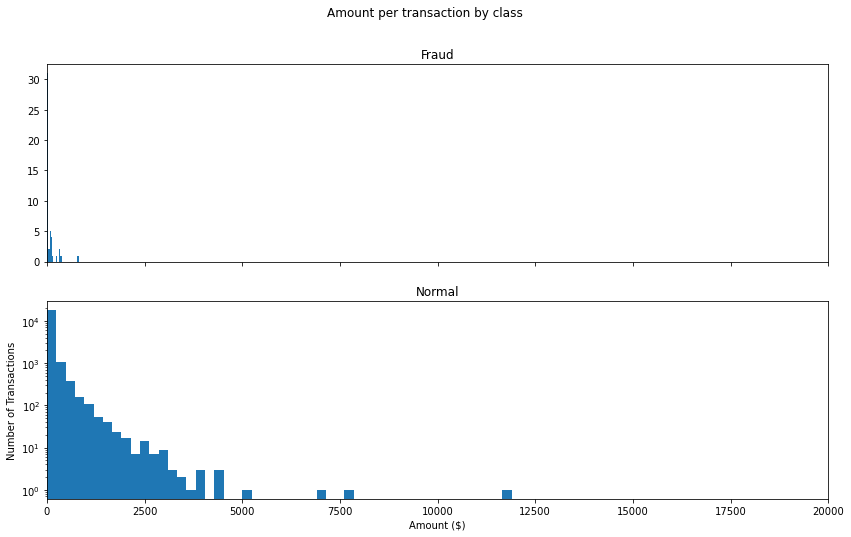

In [14]:
###
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by class')
bins = 50
ax1.hist(fraud.Amount, bins = bins)
ax1.set_title('Fraud')
ax2.hist(normal.Amount, bins = bins)
ax2.set_title('Normal')
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show();

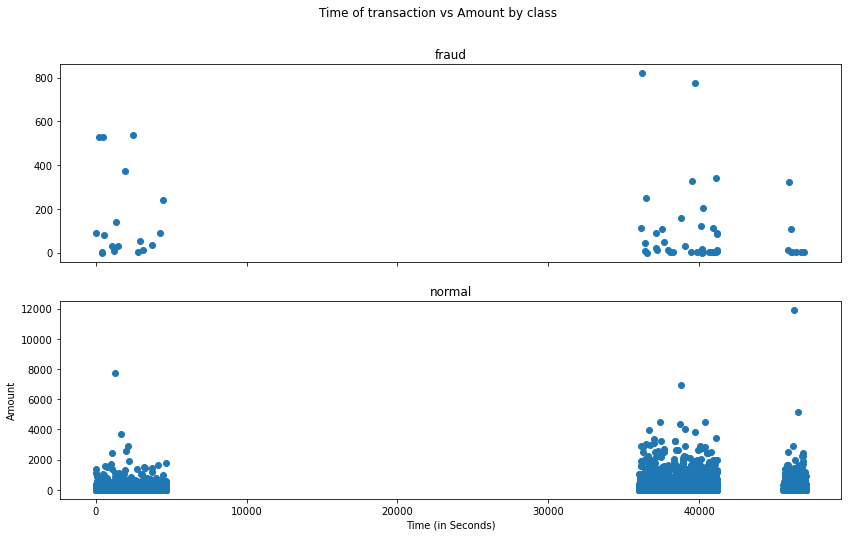

In [16]:
# We Will check Do fraudulent transactions occur more often during certain time frame ? Let us find out with a visual representation.

f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')
ax1.scatter(fraud.Time, fraud.Amount)
ax1.set_title('fraud')
ax2.scatter(normal.Time, normal.Amount)
ax2.set_title('normal')
plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

In [17]:
data.shape

(20000, 31)

In [18]:
#using dtale lib for extended eda.
dt.show(data)

In [19]:
#Determine the number of fraud and valid transactions in the dataset

Fraud = data[data['Class']==1]

Valid = data[data['Class']==0]

outlier_fraction = len(Fraud)/float(len(Valid))

In [20]:
print(outlier_fraction)

print("Fraud Cases : {}".format(len(Fraud)))

print("Valid Cases : {}".format(len(Valid)))

0.0032102728731942215
Fraud Cases : 64
Valid Cases : 19936


In [22]:
## Correlation matrix:


#to get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [25]:
#Create independent and Dependent Features
columns = data.columns.tolist()
# Filter the columns to remove data we do not want 
columns = [c for c in columns if c not in ["Class"]]
# Store the variable we are predicting 
target = "Class"
# Define a random state 
state = np.random.RandomState(42)
X = data[columns]
Y = data[target]
X_outliers = state.uniform(low=0, high=1, size=(X.shape[0], X.shape[1]))
# Print the shapes of X & Y
print(X.shape)
print(Y.shape)

(20000, 30)
(20000,)


# Unsupervised Outlier Detection:-

Now that we have processed our data, we can begin deploying our machine learning algorithms. We will use the following techniques:

## Local Outlier Factor (LOF):

The anomaly score of each sample is called Local Outlier Factor. It measures the local deviation of density of a given sample with respect to its neighbors. It is local in that the anomaly score depends on how isolated the object is with respect to the surrounding neighborhood.

## Isolation Forest Algorithm:

The IsolationForest ‘isolates’ observations by randomly selecting a feature and then randomly selecting a split value between the maximum and minimum values of the selected feature.

Since recursive partitioning can be represented by a tree structure, the number of splittings required to isolate a sample is equivalent to the path length from the root node to the terminating node.

This path length, averaged over a forest of such random trees, is a measure of normality and our decision function.

Random partitioning produces noticeably shorter paths for anomalies. Hence, when a forest of random trees collectively produce shorter path lengths for particular samples, they are highly likely to be anomalies.





In [26]:
##Define the outlier detection methods

classifiers = {
    "Isolation Forest":IsolationForest(n_estimators=100, max_samples=len(X), 
                                       contamination=outlier_fraction,random_state=state, verbose=0),
    "Local Outlier Factor":LocalOutlierFactor(n_neighbors=20, algorithm='auto', 
                                              leaf_size=30, metric='minkowski',
                                              p=2, metric_params=None, contamination=outlier_fraction),
    "Support Vector Machine":OneClassSVM(kernel='rbf', degree=3, gamma=0.1,nu=0.05,max_iter=-1)
   
   
}

In [27]:
type(classifiers)

dict

In [28]:
n_outliers = len(fraud)
for i, (clf_name,clf) in enumerate(classifiers.items()):
    #Fit the data and tag outliers
    if clf_name == "Local Outlier Factor":
        y_pred = clf.fit_predict(X)
        scores_prediction = clf.negative_outlier_factor_
    elif clf_name == "Support Vector Machine":
        clf.fit(X)
        y_pred = clf.predict(X)
    else:    
        clf.fit(X)
        scores_prediction = clf.decision_function(X)
        y_pred = clf.predict(X)
    #Reshape the prediction values to 0 for Valid transactions , 1 for Fraud transactions
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    n_errors = (y_pred != Y).sum()
    # Run Classification Metrics
    print("{}: {}".format(clf_name,n_errors))
    print("Accuracy Score :")
    print(accuracy_score(Y,y_pred))
    print("Classification Report :")
    print(classification_report(Y,y_pred))

Isolation Forest: 103
Accuracy Score :
0.99485
Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19936
           1       0.20      0.20      0.20        64

    accuracy                           0.99     20000
   macro avg       0.60      0.60      0.60     20000
weighted avg       0.99      0.99      0.99     20000

Local Outlier Factor: 119
Accuracy Score :
0.99405
Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19936
           1       0.08      0.08      0.08        64

    accuracy                           0.99     20000
   macro avg       0.54      0.54      0.54     20000
weighted avg       0.99      0.99      0.99     20000

Support Vector Machine: 8788
Accuracy Score :
0.5606
Classification Report :
              precision    recall  f1-score   support

           0       1.00      0.56      0.72     19936
           1  

#### Observations :
- Isolation Forest detected 103 errors versus Local Outlier Factor detecting 119 errors vs. SVM detecting 8788 errors
- Isolation Forest has a 99.48% more accurate than LOF of 99.40% and SVM of 56.06% respectively.
- When comparing error precision & recall for 3 models , the Isolation Forest performed much better than the LOF as we can see that the detection of fraud cases is around 27 % versus LOF detection rate of just 2 % and SVM of 0%.
- So overall Isolation Forest Method performed much better in determining the fraud cases which is around 30%.
- We can also improve on this accuracy by increasing the sample size or use deep learning algorithms however at the cost of computational expense.We can also use complex anomaly detection models to get better accuracy in determining more fraudulent cases